# **4장. 인공 신경망 모델 — 이미지 분류**

## **4-1절. 이미지 데이터의 구조 이해**

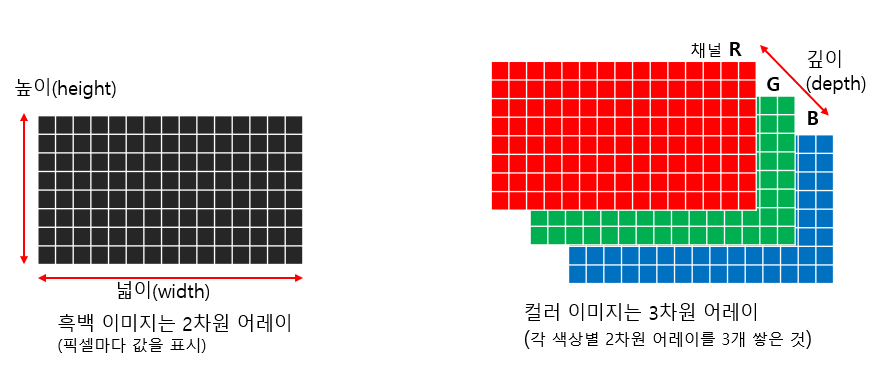

📌라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib  # 한글폰트 설치
import koreanize_matplotlib

import numpy as np; import pandas as pd; import matplotlib.pyplot as plt
from PIL import Image
import warnings; warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 92.0 MB/s eta 0:00:00


### 배열로 이미지 만들기

📌[실습 04-01] 흑백 이미지 생성하기

데이터프레임
    0    1    2
0   0  255  192
1  64  128  100

어레이
[[  0 255 192]
 [ 64 128 100]]

차원: 2
형태: (2, 3)


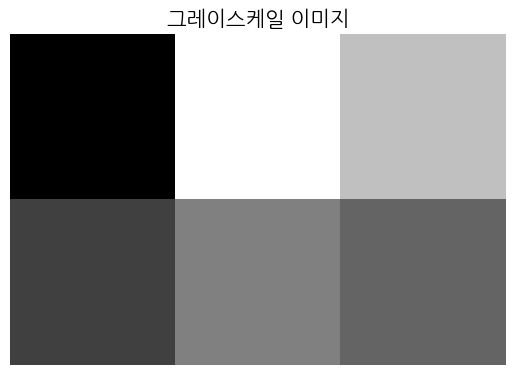

In [ ]:
# 픽셀 값 지정
프레임1=pd.DataFrame([[0, 255, 192],  # 판다스 데이터프레임 유형
                     [64, 128,100]], dtype=np.uint8)
print("데이터프레임"); print(프레임1); print()

어레이1=np.array([[0, 255, 192],   # 넘파이 어레이 유형
                    [64, 128,100]], dtype=np.uint8)
print("어레이"); print(어레이1); print()

print("차원:", 어레이1.ndim)
print("형태:", 어레이1.shape)  # (height , width)

# 배열을 이미지로 출력
plt.imshow(어레이1, cmap='gray')
plt.title("그레이스케일 이미지", fontsize=15)
plt.axis("off")   # 축 숫자 제거
plt.show()

컬러 이미지 생성하기
- 각 픽셀값은 R/G/B의 정도: 0-255 정수

📌[실습 04-02] 컬러 이미지 생성하기

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[  0 255 255]
  [255 255   0]
  [255   0 255]]]

차원: 3
형태: (2, 3, 3)


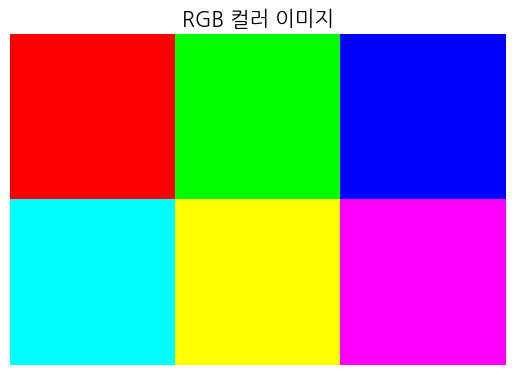

In [ ]:
# 픽셀 값 지정 (행렬의 값에 3차원 리스트 지정 )
어레이2=np.array([[[255, 0,  0], [0,   255, 0], [0,   0, 255]],
                   [[0, 255, 255], [255, 255, 0], [255, 0, 255]]],dtype=np.uint8)

print(어레이2); print()
print("차원:", 어레이2.ndim)    # 3차원
print("형태:", 어레이2.shape)   # (높이, 넓이, 깊이) = (2, 3, 3 )

# 배열을 이미지로 출력
plt.imshow(어레이2)
plt.title("RGB 컬러 이미지", fontsize=15)
plt.axis("off")   # 축 숫자 제거
plt.show()

📌채널별로 어레이 분리하기

In [ ]:
print("R-채널"); print(어레이2[:,:,0]); print()
print("G-채널"); print(어레이2[:,:,1]); print()
print("B-채널"); print(어레이2[:,:,2])

R-채널
[[255   0   0]
 [  0 255 255]]

G-채널
[[  0 255   0]
 [255 255   0]]

B-채널
[[  0   0 255]
 [255   0 255]]


📌[실습 04-03] 이미지 파일을 불러오고 출력하기

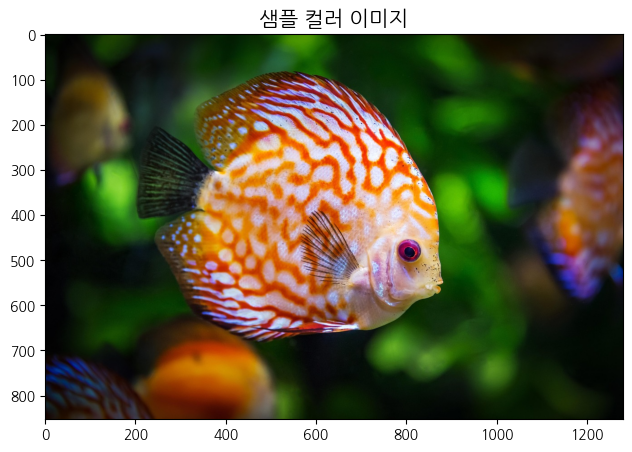

In [ ]:
plt.figure(figsize=(8, 5))
img=Image.open("샘플이미지.jpg")   # 이미지 불러오기
plt.imshow(img)   # 이미지 출력
plt.title("샘플 컬러 이미지", fontsize=15)
plt.show()

📌[실습 04-04] 이미지를 배열로 변환하기

In [ ]:
arr=np.array(img)   # 이미지를 어레이로 변환
print("차원= ", arr.ndim); print()
print("형태= ", arr.shape); print()
print("[500,800] 픽셀의 R/G/B 값 =", arr[500,800,:])


차원=  3

형태=  (853, 1280, 3)

[500,800] 픽셀의 R/G/B 값 = [81 20 62]


📌[실습 04-05] 컬러 이미지를 흑백 이미지로 변환하기

차원= 2

형태= (853, 1280)

[500, 800] 픽셀값= 43


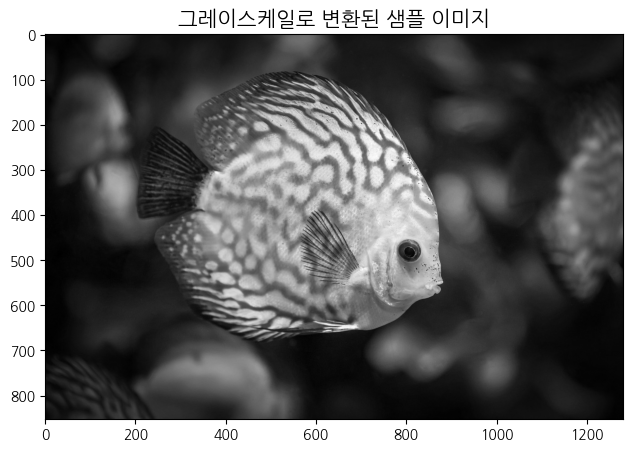

In [ ]:
#arr_1=((arr[:,:,0] + 0.587*arr[:,:,1] + arr[:,:,2])/3).astype(np.uint8) # R/G/B의 단순 평균
arr_1=(0.299*arr[:, :, 0] + 0.587*arr[:, :, 1] + 0.114*arr[:, :, 2]).astype(np.uint8) # 가중 평균

print("차원=", arr_1.ndim); print()
print("형태=", arr_1.shape); print()
print("[500, 800] 픽셀값=", arr_1[500,800])
plt.figure(figsize=(8, 5))
plt.imshow(arr_1, cmap="gray") # 이미지로 출력
plt.title("그레이스케일로 변환된 샘플 이미지", fontsize=15)
plt.show()

▶	원본 RGB 배열의 3개 채널값은 일정한 비율로 가중 평균되어 0부터 255까지의 범위의 정수로 변환되었는데, 이는 그레이스케일에 대한 국제 표준(ITU-R BT.601) 비율입니다. 이렇게 해야 색상이 제거되고, 사람의 눈에 적합한 흑백 이미지가 만들어진다고 합니다.

## 이미지의 유사성 평가하기

📌[실습 04-06] 랜덤 이미지 만들기

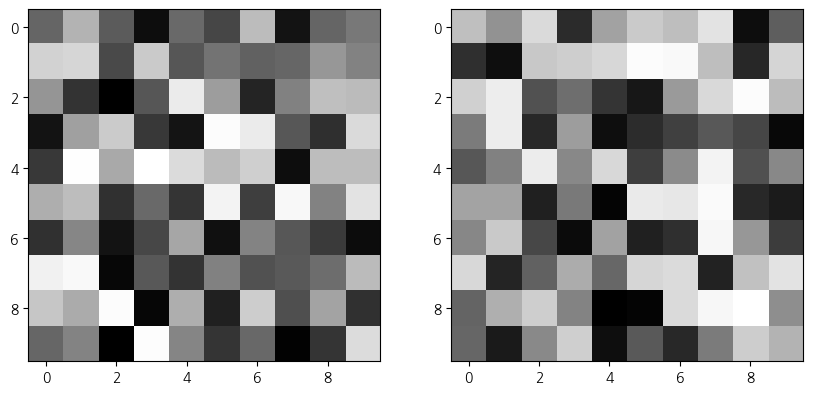

In [ ]:
np.random.seed(42)  # 랜덤시드 고정
img0=np.random.randint(0, 256, size=(10, 10)) # 0~255 무작위 정수를 10x10 픽셀로 생성
img1=np.random.randint(0, 256, size=(10, 10))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img0, cmap="gray")
plt.subplot(1, 2, 2); plt.imshow(img1, cmap="gray")
plt.show()


📌[실습 04-07] 이미지의 차이를 숫자로 평가하기

In [ ]:
차이제곱합=np.sum((img0-img1)**2) # 각 픽셀의 차이를 제곱하여 합산
d=np.sqrt(차이제곱합)  # 제곱근(루트)
print(f"유클리디언 거리= {d: .2f}")

유클리디언 거리=  1052.99


📌[실습 04-08] 유클리디언 거리를 계산하는 함수 만들기

In [ ]:
def 거리(p, q):
  z=np.sum((p - q) ** 2)   # 각 픽셀의 차이제곱 합을 돌려줌
  return np.sqrt(z)

print(f"유클리디언 거리= {거리(img0, img1): .2f}")


유클리디언 거리=  1052.99


(대안) 맨해튼  거리를 계산하는 함수 만들기

In [ ]:
def 거리_L1(p, q):
  z=np.abs(p - q).sum()   # 각 픽셀의 차이 절대값의 합 (L1 distance)
  return np.sqrt(z)

print(f"맨해튼 거리= {거리_L1(img0, img1): .2f}")


맨해튼 거리=  93.01
